In [16]:
import numpy as np
import matplotlib.pyplot as plt

[-3.52048368 -2.52048368 -1.52048368 -0.52048368  0.47951632  1.47951632
  2.47951632  3.47951632  4.47951632  5.47951632  6.47951632  7.47951632
  8.47951632  9.47951632 10.47951632] 3.9659925292560163


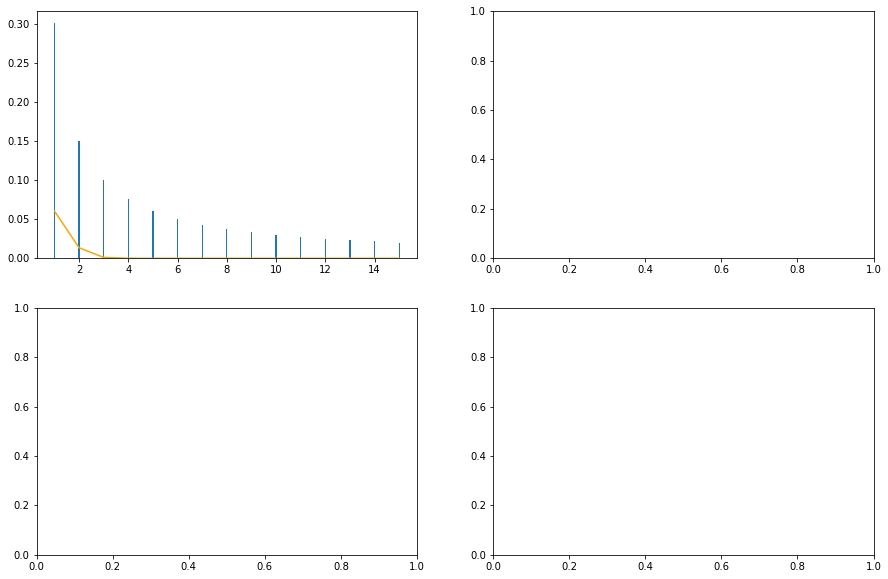

In [17]:
datanum=15
X1=np.linspace(1,15,datanum)
Y=1/(0.1*X1)
Y1=Y/sum(Y)
Y00=Y1
X00=(X1-sum(X1*Y1))/(np.average((X1-sum(X1*Y1))**2,weights=Y1)**0.5)
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes[0,0].bar(X1, height=Y1, width=0.05);
axes[0,0].plot(X1,1/((2*np.pi)**0.5)*np.exp(-X1**2/2)/4,color="orange")
probdict={}
for i in range(datanum):
    probdict[X1[i]]=probdict.get(X1[i],0)+Y1[i]
newdict=probdict.copy()
print((X1-sum(X1*Y1)),(np.average((X1-sum(X1*Y1))**2,weights=Y1))**0.5)

In [18]:
def sample(n):
    global newdict
    for i in range(n):
        tempdict={}
        for i1 in range(datanum):
            for i2 in newdict.keys():
                tempdict[X1[i1]+i2]=tempdict.get(X1[i1]+i2,0)+Y1[i1]*newdict[i2]
        newdict=tempdict.copy()

In [115]:
sample(4)
X01=np.array(list(newdict.keys()))
Y01=np.array(list(newdict.values()))
sample(5)
X10=np.array(list(newdict.keys()))
Y10=np.array(list(newdict.values()))
sample(90)
X11=np.array(list(newdict.keys()))
Y11=np.array(list(newdict.values()))
X01std=(X01-sum(X01*Y01))/(np.average((X01-sum(X01*Y01))**2,weights=Y01)**0.5)
X10std=(X10-sum(X10*Y10))/(np.average((X10-sum(X10*Y10))**2,weights=Y10)**0.5)
X11std=(X11-sum(X11*Y11))/(np.average((X11-sum(X11*Y11))**2,weights=Y11)**0.5)

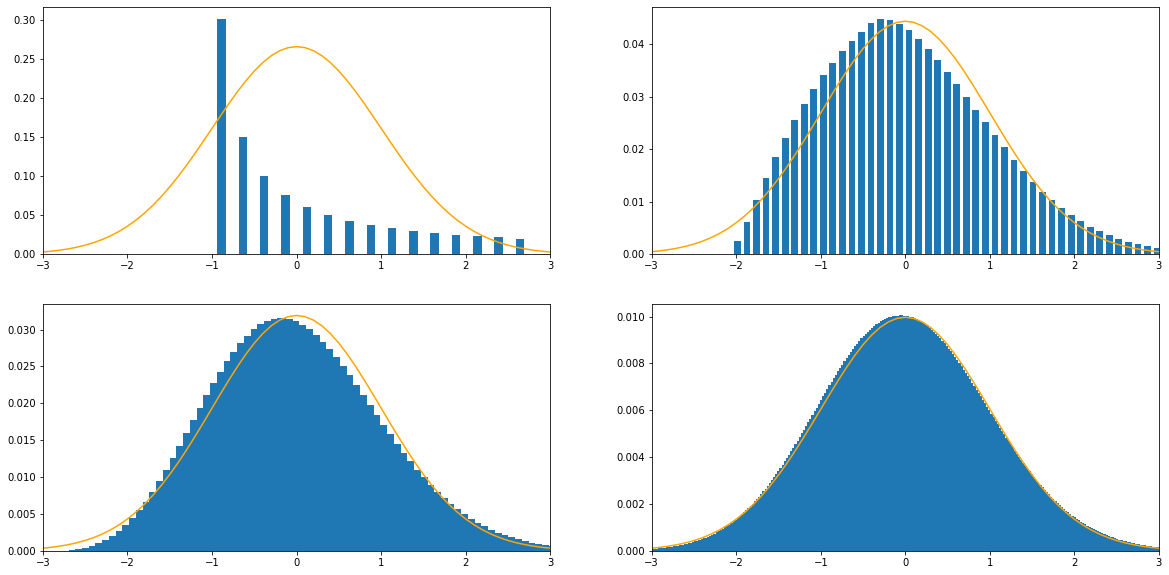

In [123]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
axes[0,0].set_xlim(-3,3)
axes[0,1].set_xlim(-3,3)
axes[1,0].set_xlim(-3,3)
axes[1,1].set_xlim(-3,3)
axes[0,0].bar(X00, height=Y00, width=0.1);
axes[0,1].bar(X01std, height=Y01, width=0.08);
axes[1,0].bar(X10std, height=Y10, width=0.1);
axes[1,1].bar(X11std, height=Y11, width=0.05);
Xnormal=np.linspace(-3,3,61)
Ynormal=1/((2*np.pi)**0.5)*np.exp(-Xnormal**2/2)
axes[0,0].plot(Xnormal,Ynormal/1.5,color="orange")
axes[0,1].plot(Xnormal,Ynormal/9,color="orange")
axes[1,0].plot(Xnormal,Ynormal/12.5,color="orange")
axes[1,1].plot(Xnormal,Ynormal/40,color="orange")

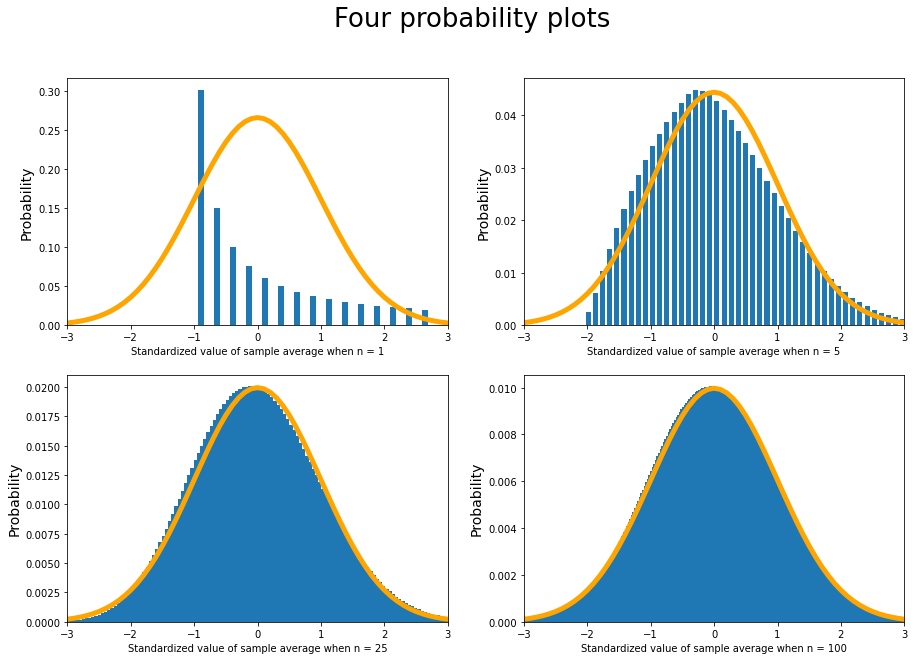

In [23]:
#引入作图所需两个库numpy和matplotlib.plt
import numpy as np
import matplotlib.pyplot as plt

#参数设定选取数据个数，方便修改
datanum=15

#根据指定数量与区间选取X的值
X1=np.linspace(1,15,datanum)

#根据一定的规则设定Y（X1的相对频率），再转化为概率Y1，初始概率Y00与之相同
Y=1/X1
Y1=Y/sum(Y)
Y00=Y1

#建立一个字典，键为每次抽样后，所有可能X的总和的值，对应值为每一个X总和对应的概率
#由于标准化后，总和值与均值是相同的，故标准化前取用总和值以简便计算
newdict={}

#用初始的X与概率Y建立字典
for i in range(datanum):
    newdict[X1[i]]=newdict.get(X1[i],0)+Y1[i]
    
#sample函数为进行一次抽样
#抽样的原理是将第n-1次抽样结果的每一项概率依次乘以单次抽样的概率，加到两个结果的和的概率上
#如Pn(4)=[Pn-1(3)+P1(1)]+[Pn-1(2)+P1(2)]+......
def sample(n):
    global newdict
    for i in range(n):
        tempdict={}
        for i1 in range(datanum):
            for i2 in newdict.keys():
                tempdict[X1[i1]+i2]=tempdict.get(X1[i1]+i2,0)+Y1[i1]*newdict[i2]
        newdict=tempdict.copy()

#图中依次为n次抽样，n=1,n=5,n=25,n=100的情况，为加快运算速度，每次抽样数为间隔两个n之间的差值
#如n=25的情况下，保留结果，再进行75次抽样可得n=100的情况
#keys即为所有可能的结果，values为结果对应的概率
sample(4)
X01=np.array(list(newdict.keys()))
Y01=np.array(list(newdict.values()))
sample(20)
X10=np.array(list(newdict.keys()))
Y10=np.array(list(newdict.values()))
sample(75)
X11=np.array(list(newdict.keys()))
Y11=np.array(list(newdict.values()))

#将X进行标准化，根据x'=(x-μ)/σ计算
X00std=(X1-sum(X1*Y1))/(np.average((X1-sum(X1*Y1))**2,weights=Y1)**0.5)
X01std=(X01-sum(X01*Y01))/(np.average((X01-sum(X01*Y01))**2,weights=Y01)**0.5)
X10std=(X10-sum(X10*Y10))/(np.average((X10-sum(X10*Y10))**2,weights=Y10)**0.5)
X11std=(X11-sum(X11*Y11))/(np.average((X11-sum(X11*Y11))**2,weights=Y11)**0.5)

#以下为作图步骤，根据每个n对应的X,Y作图
#设定画布
fig,axes=plt.subplots(2,2,figsize=(15,10))

#设定图像横轴左右边界
axes[0,0].set_xlim(-3,3)
axes[0,1].set_xlim(-3,3)
axes[1,0].set_xlim(-3,3)
axes[1,1].set_xlim(-3,3)

#画概率对应条形图
axes[0,0].bar(X00std, height=Y00, width=0.1);
axes[0,1].bar(X01std, height=Y01, width=0.08);
axes[1,0].bar(X10std, height=Y10, width=0.1);
axes[1,1].bar(X11std, height=Y11, width=0.05);

#取足够密的点连线，画出正态分布线
Xnormal=np.linspace(-3,3,61)
Ynormal=1/((2*np.pi)**0.5)*np.exp(-Xnormal**2/2)
axes[0,0].plot(Xnormal,Ynormal/1.5,color="orange",linewidth=5)
axes[0,1].plot(Xnormal,Ynormal/9,color="orange",linewidth=5)
axes[1,0].plot(Xnormal,Ynormal/20,color="orange",linewidth=5)
axes[1,1].plot(Xnormal,Ynormal/40,color="orange",linewidth=5);

#对图形标注并保存
nlist=[[1,5],[25,100]]
for i in [0,1]:
    for j in [0,1]:
        axes[i,j].set_xlabel("Standardized value of sample average when n = {}".format\
                             (nlist[i][j],fontsize=20))
        axes[i,j].set_ylabel("Probability",fontsize=14)
fig.suptitle('Four probability plots', fontsize=26);
fig.savefig("Four_plots.pdf",format="pdf")
fig.savefig("Four_plots.png",format="png")